# CMPE 232 Project : Mimicking TensorFlow

## Group Name: Placeholder

### Members:
#### - Hasan Kemik 116207076
#### - Ali Çağan Keskin 116200079

## Index
- [Needed Libraries](#Needed-Libraries)
- [Classes](#Classes)
- [Functions](#Functions)
 + [Understanding Math Operation](#Understanding-Math-Operation)
 + [Forward Propogation Function](#Forward-Propogation-Function)
 + [Backward Propogation Function](#Backward-Propogation-Function)
- [User Input](#String)
- [Graphical Representation of the String](#Graphical-Representation-of-the-Equation)
- [Graphical Representation of the Reversed String](#Graphical-Representation-of-the-Reverse-Graph)
- [Forward Propogation](#Forward-Propogation)
- [Backward Propogation](#Backward-Propogation)

# Needed libraries

In [1]:
import numpy as np
from functools import reduce #python 3
import operator
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

# Classes

In [2]:
# class for addition
class add():
    def __init__(self,inputs):
        self.inputs = inputs
        
    def compute(self):
        return sum(self.inputs)

In [3]:
# class for substraction
class subtract():
    def __init__(self,inputs):
        self.inputs = inputs
        
    def compute(self):
        return (self.inputs[1] - self.inputs[0])

In [4]:
# class for division
class division():
    def __init__(self,inputs):
        self.inputs = inputs
        
    def compute(self):
        return (self.inputs[0] / self.inputs[1])

In [5]:
# class for matrix multiplication
class matmul():
    def __init__(self,inputs):
        self.inputs = inputs
        
    def compute(self):
        if len(self.inputs[0]) > 1:
            x = self.inputs[0]
            for y in self.inputs[1:]:
                x = np.dot(x,y)
        return x

In [6]:
# class for activation function
class sigmoid():
    def __init__(self,inputs):
        self.inputs = inputs
        
    def compute(self):
        return 1 / (1 + np.exp(-self.inputs[0]))

In [7]:
# class for multiplication
# try except block is used if the one of the inputs are a number and other one is a matrix.
class multiply():
    def __init__(self, inputs):
        self.inputs = inputs
        
    def compute(self):
        try:
            x = reduce(lambda x, y: x * y, self.inputs, 1)
        except:
            x = self.inputs[0]*self.inputs[1]
        return x

In [8]:
# class that holds varible
class Variable(): 
    def __init__(self, initial_value):
        self.value = initial_value
    
    def compute(self):
        return self.value

In [9]:
# class for placeholder
class Placeholder(): 
    def __init__(self,value = None):
        self.value = value
        
    def change_value(self,value):
        self.value = value
    
    def compute(self):
        return self.value

In [10]:
# class for Nodes
# input attribute is the list of nodes which comes into the node
# output attribute is the list of nodes which goes from the node
# n_type attribute is the Type of Node. With this attribute, we can 
# classify the Node's operation.

# The node type can be Add, MatMul, Multiply, Sigmoid, Subtract,
# Division, Variable, Placeholder.

# This way, we can choose which class that we defined above, will be used for operation.
class node():   
    def __init__(self,inputs,outputs,n_type):
        
        self.inputs = inputs
        self.outputs = outputs
        self.n_type = n_type
        
        if len(n_type) > 1 and n_type[0] == "Operation":
            
            if n_type[1] == "Add":
                self.value = add(inputs)
            elif n_type[1] == "MatMul":
                self.value = matmul(inputs)
            elif n_type[1] == "Multiply":
                self.value = multiply(inputs)
            elif n_type[1] == "Sigmoid":
                self.value = sigmoid(inputs)
            elif n_type[1] == "Subtract":
                self.value = subtract(inputs)
            elif n_type[1] == "Division":
                self.value = division(inputs)
            else:
                self.value = null
                print("Please check the operation parameter you've given.")
        
        elif n_type == ["Variable"]:
            self.value = Variable(inputs)
            
        elif n_type == ["Placeholder"]:
            self.value = Placeholder()
            
    
    def compute(self):
        return self.value.compute()
    
    def change_value(self,val):
        self.value.change_value(val)
    
    def change_inp(self,inp):
        self.value.inputs = inp
        
    def return_val(self):
        return self.value.value
    
    def return_type(self):
        return self.n_type

In [11]:
# the class which visualises the graph.
class draw_graph():
    def __init__(self,node_list,edge_list,color_map,label_dict):
        self.G = nx.DiGraph()
        self.color_map = color_map
        self.G.add_nodes_from(node_list)
        self.G.add_edges_from(edge_list)
        self.G = nx.relabel_nodes(self.G,label_dict)
    
    def draw(self):
        nx.draw_spring(self.G,node_color = self.color_map ,node_size = 500, with_labels = True)

In [12]:
# the class which visualises the reversed graph.
class draw_reverse_graph():
    def __init__(self,node_list,edge_list,color_map,label_dict):
        self.color_map = color_map
        self.G = nx.DiGraph()
        edge_list = reversedGraph().reverse(edge_list)
        self.G.add_nodes_from(node_list)
        self.G.add_edges_from(edge_list)
        self.G = nx.relabel_nodes(self.G,label_dict)
        
    def draw(self):
        nx.draw_circular(self.G,node_color = self.color_map ,node_size = 500, with_labels = True)


In [13]:
# the class which reverses the graph
class reversedGraph(): 
    @staticmethod
    def reverse(edge_list):
        reversed_elist = [(t,s) for s, t in  edge_list]
        return reversed_elist

In [14]:
# the class for Depth First Search
class DirectedDFS():
    def __init__(self, G, node_list):
        self.G = G
        self.visited = {node_name: False for node_name in node_list}
        self.traversal = []
        
    def dfs(self, sname):
        self.visited[sname] = True
        self.traversal.append(sname)
        for neighbor in sname.inputs:
            try:
                if (not self.visited[neighbor]):
                    self.dfs(neighbor)
            except:
                continue
    def return_traversal(self):
        x = self.traversal
        return x

# Functions

### Understanding Math Operation

In [15]:
# since that the equation will be given as a String,
# this is the function for understand the characters 
# we will be using djikstra's two stack algorithm to inspect the equation.
# First, we created some empty lists and read the string one time to create variable and placeholder nodes,
# after to create the operation nodes, using djikstra's two stack algorithm, we read the string once again.


def math_operands_split(mat_op):
    operators = ["+","-","/","*",":","|"]
    op_stack = []
    numb_stack = []
    numb_stack_cont = []
    op_stack_cont = []
    placeholder_nodes = []
    variable_nodes = []
    variable_dict = {}
    label_dict = {}
    operation_nodes = []
    placeholder_nodes2 = []
    variable_nodes2 = []
    operation_nodes2 = []
    edge_list = []
    color_map = []
    node_list = []
    mat_op = mat_op.split()
    
    if len(mat_op) == 1 and type(mat_op[0]) == str:
        mat_op = list(mat_op[0])
        for char in mat_op:
            if char in operators:
                op_stack_cont.append(char)
            elif char not in operators and char != '(' and char != ')':
                numb_stack.append(char)
                numb_stack_cont.append(char)
        placeholder_nodes.append([node([],[],["Placeholder"]) for x in range (len(numb_stack)+1)])
        variable_nodes.append([node([x],[],["Variable"]) for x in numb_stack])
        
        numb_stack = []
        op_stack = []
        i = 0
        for char in mat_op:
            if char == ')' and len(op_stack) > 0:
                operation = op_stack.pop()
                val1 = numb_stack.pop()
                val2 = numb_stack.pop()
                if operation is '+':
                    x = (node([val1,val2],[],["Operation","Add"]))
                    operation_nodes.append(x)
                    label_dict[x] = ("+"+ "/" +str(i))
                    i = i + 1
                    numb_stack.append(x)
                elif operation is '*':
                    x = (node([val1,val2],[],["Operation","Multiply"]))
                    operation_nodes.append(x)
                    label_dict[x] = ("*"+ "/" +str(i))
                    i = i + 1
                    numb_stack.append(x)
                elif operation is '-':
                    x = (node([val1,val2],[],["Operation","Subtract"]))
                    operation_nodes.append(x)
                    label_dict[x] = ("-"+ "/" +str(i))
                    i = i + 1
                    numb_stack.append(x)
                elif operation is '/' or operation is ":":
                    x = (node([val1,val2],[],["Operation","Division"]))
                    operation_nodes.append(x)
                    label_dict[x] = ("/"+ "/" +str(i))
                    i = i + 1
                    numb_stack.append(x)
                elif operation is '|':
                    x = (node([val1,val2],[],["Operation","MatMul"]))
                    operation_nodes.append(x)
                    label_dict[x] = ("|"+ "/" +str(i))
                    i = i + 1
                    numb_stack.append(x)
            elif char in operators:
                op_stack.append(char)
            elif char not in operators and char != '(' and char != ')':
                numb_stack.append(char)
                    
        while len(op_stack) > 0:
            operation = op_stack.pop(0)
            val1 = numb_stack.pop(0)
            val2 = numb_stack.pop(0)
            if operation is '+':
                x = (node([val1,val2],[],["Operation","Add"]))
                operation_nodes.append(x)
                label_dict[x] = ("+"+ "/" +str(i))
                i = i + 1
                numb_stack.append(x)
            elif operation is '*':
                x = (node([val1,val2],[],["Operation","Multiply"]))
                operation_nodes.append(x)
                label_dict[x] = ("*"+ "/" +str(i))
                i = i + 1
                numb_stack.append(x)
            elif operation is '-':
                x = (node([val1,val2],[],["Operation","Subtract"]))
                operation_nodes.append(x)
                label_dict[x] = ("-"+ "/" +str(i))
                i = i + 1
                numb_stack.append(x)
            elif operation is '/' or operation is ":":
                x = (node([val1,val2],[],["Operation","Division"]))
                operation_nodes.append(x)
                label_dict[x] = ("/"+ "/" +str(i))
                i = i + 1
                numb_stack.append(x)
            elif operation is '|':
                x = (node([val1,val2],[],["Operation","MatMul"]))
                operation_nodes.append(x)
                label_dict[x] = ("*"+ "/" +str(i))
                i = i + 1
                numb_stack.append(x)
            
# Creating nodes and initializing links between them is finished by reading the string twice.
# In the for nodes below, node list and edge list creations is finished with along color map and label dictionary
# for a human friendly representations of the nodes.
            
        for nodes in variable_nodes:
            for my_node in nodes:
                variable_nodes2.append(my_node)
                node_list.append(my_node)
                
        for nodes in placeholder_nodes:
            for my_node in nodes:
                placeholder_nodes2.append(my_node)
                node_list.append(my_node)
        
        for nodes in operation_nodes:
            operation_nodes2.append(nodes)
            node_list.append(nodes)
        
        i = 0
        for my_node in placeholder_nodes2[:-1]:
            edge_list.append([variable_nodes2[i],my_node])
            i = i + 1
        
        for my_node in operation_nodes2:
            for inputs in my_node.inputs:
                edge_list.append([inputs,my_node])
        
        i = 0    
        for nodes in variable_nodes2:
            placeholder_nodes2[i].inputs = nodes
            variable_dict[numb_stack_cont[i]] = nodes
            label_dict[nodes] = (numb_stack_cont[i]+"/"+str(i))
            i = i + 1
            
        edge_list.append([operation_nodes[-1],placeholder_nodes2[-1]])
        placeholder_nodes2[-1].inputs = [operation_nodes[-1]]
        
        for a in range (len(edge_list)):
            if type(edge_list[a][0]) is str:
                index = numb_stack_cont.index(edge_list[a][0])
                edge_list[a][0] = placeholder_nodes2[index]

        for my_node in variable_nodes2:
            color_map.append("yellow")
        
        i = 0
        for my_node in placeholder_nodes2:
            color_map.append("red")
            label_dict[my_node] = ("P" + "/" +  str(i))
            i = i + 1
        
        for my_node in operation_nodes2:
            color_map.append("lightblue")
        
        return [node_list,edge_list,color_map,label_dict,placeholder_nodes2[-1]]
    else:
        # this else part is used for if the string has blanks. So it basically helps to understand every string without
        # boundaries like need of the space after every character.
        return math_operands_split(''.join(mat_op))

### Forward Propogation Function

In [16]:
# Mapping the values according the input strings and data dictionary and then computing the forward propogation
# according to the traversal list, computing the variables and assigning operation nodes to data dictionary.
def forward_propogation(my_traversal):
    while len(my_traversal) > 0:
            my_node = my_traversal.pop()
            if my_node.return_type()[0] == "Placeholder":
                x = [data[number] for number in my_node.inputs]
                my_node.change_value(x)
                print(my_node.return_val())
            else:
                print(label_dict[my_node])
                x = [data[number] for number in my_node.inputs]
                print(x,"mapped values")
                my_node.change_inp(x)
                y = my_node.compute()
                print(y,"result")
                data[my_node] = y

### Backward Propogation Function

In [17]:
# In order to compute the derivative of the nodes according to it's inputs, we're using a simple approach like
# Increasing it by 0.001 and subtracting that incremented value from the default computed one,
# then dividing the result into 0.001. Which acting as a delay operator.
def backward_propogation(my_traversal):
    while len(my_traversal) > 0:
        my_node = my_traversal.pop()
        if my_node.return_type()[0] != 'Placeholder':
            if my_node.return_type()[1] != "Subtract":
                print(label_dict[my_node],"my node")
                x = []
                for inputs in my_node.inputs:
                    print(data[inputs],"inputs")
                    inputs_default = data[inputs]
                    changed_input = inputs_default + 0.001
                    x.append(changed_input)
                i = 0
                for number in my_node.inputs:
                    my_node.change_inp([data[number],x[i-1]])
                    y = my_node.compute()
                    the_diff = y -data[my_node]
                    print(round(the_diff/0.001),"The Derivative")
                    i = i + 1
            else:
                print(label_dict[my_node],"my node")
                x = []
                for inputs in my_node.inputs:
                    print(data[inputs],"inputs")
                    inputs_default = data[inputs]
                    changed_input = inputs_default + 0.001
                    x.append(changed_input)
                i = 0
                for number in my_node.inputs:
                    if i == 0:
                        my_node.change_inp([data[number],x[i-1]])
                        y = my_node.compute()
                        the_diff = y - data[my_node]
                        print(round(the_diff/0.001),"The Derivative")
                        i = i + 1
                    else:
                        my_node.change_inp([x[i-1],data[number]])
                        y = my_node.compute()
                        the_diff = y - data[my_node]
                        print(round(the_diff/0.001),"The Derivative")
                        i = i + 1

# String

- You don't have to put any closing parantheses for operations to be understood, but if you want to specify the operation order, then you need them. To check you can try (e + f) and e + f as stated below. Both will give different answers.

In [18]:
# [node_list, edge_list,color_map,label_dict,reverse_start_node] = math_operands_split("a*(b + (c*d)) - e + f")
# data = {'a':5.0,'b':3.0,'c':2.0,'d':4.0,'e':5.0,'f':2.0}

In [19]:
[node_list, edge_list,color_map,label_dict,reverse_start_node] = math_operands_split("a*(b + (c*d)) - (e + f)")
data = {'a':5.0,'b':3.0,'c':2.0,'d':4.0,'e':5.0,'f':2.0}

In [20]:
G1 = draw_graph(node_list,edge_list,color_map,label_dict)
G2 = draw_reverse_graph(node_list,edge_list,color_map,label_dict)

## Graphical Representation of the Equation

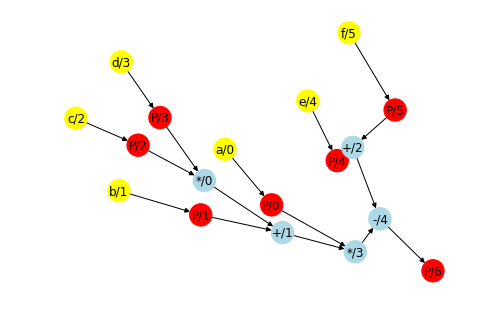

In [31]:
G1.draw()

## Graphical Representation of the Reverse Graph

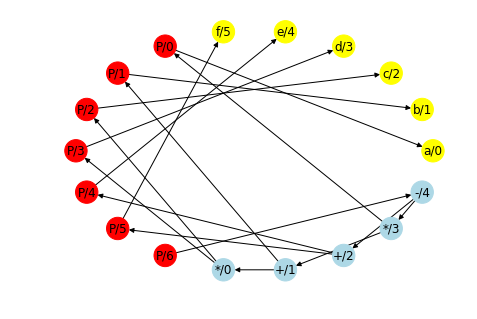

In [22]:
G2.draw()

# Forward Propogation

In [23]:
my_traversal = []

In [24]:
dfs = DirectedDFS(G2,node_list)
dfs.dfs(reverse_start_node)
none = [my_traversal.append(my_node) for my_node in dfs.return_traversal()]

In [25]:
forward_propogation(my_traversal)

*/0
[4.0, 2.0] mapped values
8.0 result
+/1
[8.0, 3.0] mapped values
11.0 result
*/3
[5.0, 11.0] mapped values
55.0 result
+/2
[2.0, 5.0] mapped values
7.0 result
-/4
[7.0, 55.0] mapped values
48.0 result
[48.0]


# Backward Propogation
###### The output of the backward propogation is like:

(operation) my node 

(value1) inputs  

(value2) inputs

###### And the result should follow like:

(value2)'s derivative

(value1)'s derivative


In [26]:
none = [my_traversal.append(my_node) for my_node in dfs.return_traversal()]

In [27]:
backward_propogation(my_traversal)

*/0 my node
4.0 inputs
2.0 inputs
4 The Derivative
2 The Derivative
+/1 my node
8.0 inputs
3.0 inputs
1 The Derivative
1 The Derivative
*/3 my node
5.0 inputs
11.0 inputs
5 The Derivative
11 The Derivative
+/2 my node
2.0 inputs
5.0 inputs
1 The Derivative
1 The Derivative
-/4 my node
7.0 inputs
55.0 inputs
1 The Derivative
-1 The Derivative
